In [1]:
import pandas as pd 
import numpy as np 
import os
from methods.basic_data_inspection import DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy, DataInspector
from methods.missing_values_inspection import analyze_missing_values
from methods.unique_value_analyzer import UniqueValueAnalyzer
from methods.datetime_analysis import BasicDateTimeAnalyzer

In [2]:

file_path = '/home/kabyik/Desktop/customer-lifecycle-management/data/Online_Retail.xlsx'
if os.path.exists(file_path):
    df = pd.read_excel(file_path)
else:
    print(f"File not found: {file_path}")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Initialize the DataInspector with a strategy
inspector = DataInspector(strategy= DataTypesInspectionStrategy())
inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


# Insights
- #### The data consists of 541909 rows and 8 columns.
- #### There are 4 Categorical Columns :
    - InvoiceNo
    - StockCode
    - Description
    - Country
- #### There are 3 Numerical Columns :
    - Quantity
    - UnitPrice
    - CustomerID
- #### There is 1 DateTime Column:
    - InvoiceDate

In [5]:
inspector = DataInspector(strategy= SummaryStatisticsInspectionStrategy())
inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

Summary Statistics (Categorical Features):
        InvoiceNo StockCode                         Description  \
count    

## From the above data we have derived that :
- #### There has been a mass cancellation of order which led to the minimum order quantity value of -80995 while the maximum is also the same in positive.
- #### UnitPrice got potential outliers where min value is -11062 and max value is 38970, while the mean of the column is 4.
- #### The timeframe of the dataset is between 1st December,2010 to 9th December,2011.

Missing Values Statistics:
Total missing values: 136534

Missing values by column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values percentage:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


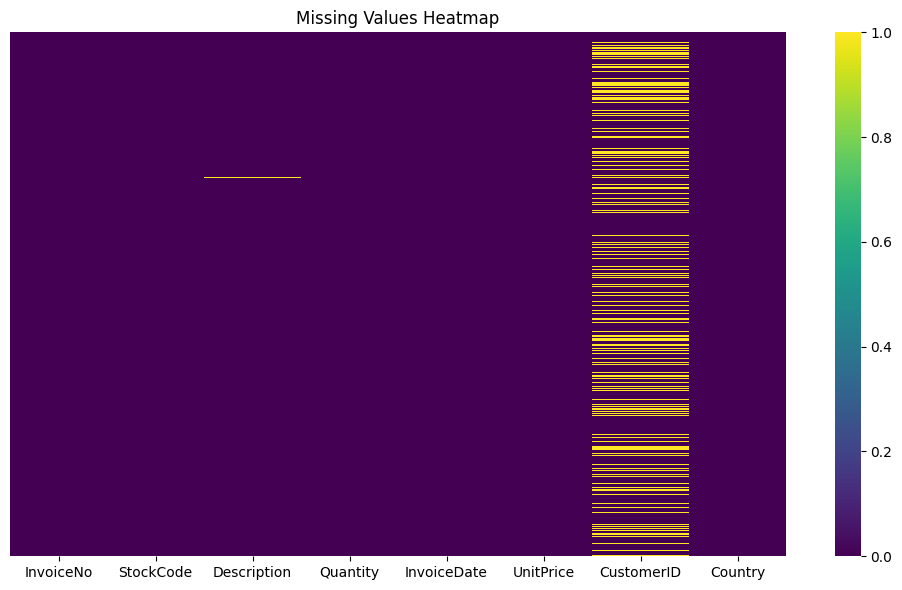

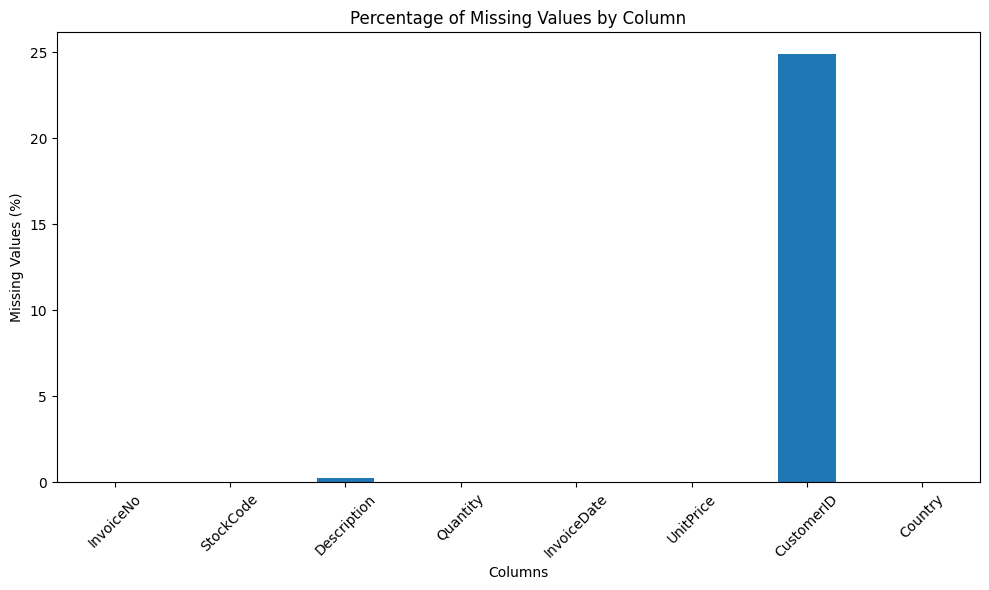

In [6]:
analyze_missing_values(df)

## From the above Analysis, we can conclude :

- #### 24.9% of CustomerID are missing and must be dropped from our dataset for a robust model.

## We should drop the following columns before training our CLTV Model for simplicity:

- #### Country
- #### Description
- #### InvoiceNo
- #### StockCode

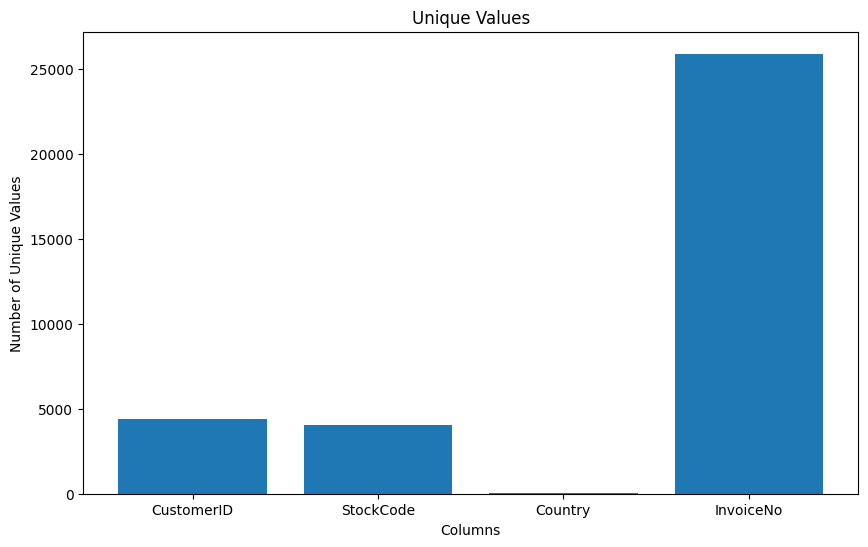

{'CustomerID': 4372, 'StockCode': 4070, 'Country': 38, 'InvoiceNo': 25900}


In [7]:
analyzer = UniqueValueAnalyzer()
columns_to_analyze = ['CustomerID', 'StockCode', 'Country', 'InvoiceNo']
result = analyzer.analyze(df, columns_to_analyze)
print(result)

## From the given Barchart we can clearly see that -
- #### There are 4372 different customers in our dataset.
- #### The store consists of 4070 different items.
- #### Total 25900 purchases were made with Invoice No.
- #### Total 38 different countries' customers have made purchase from the store.

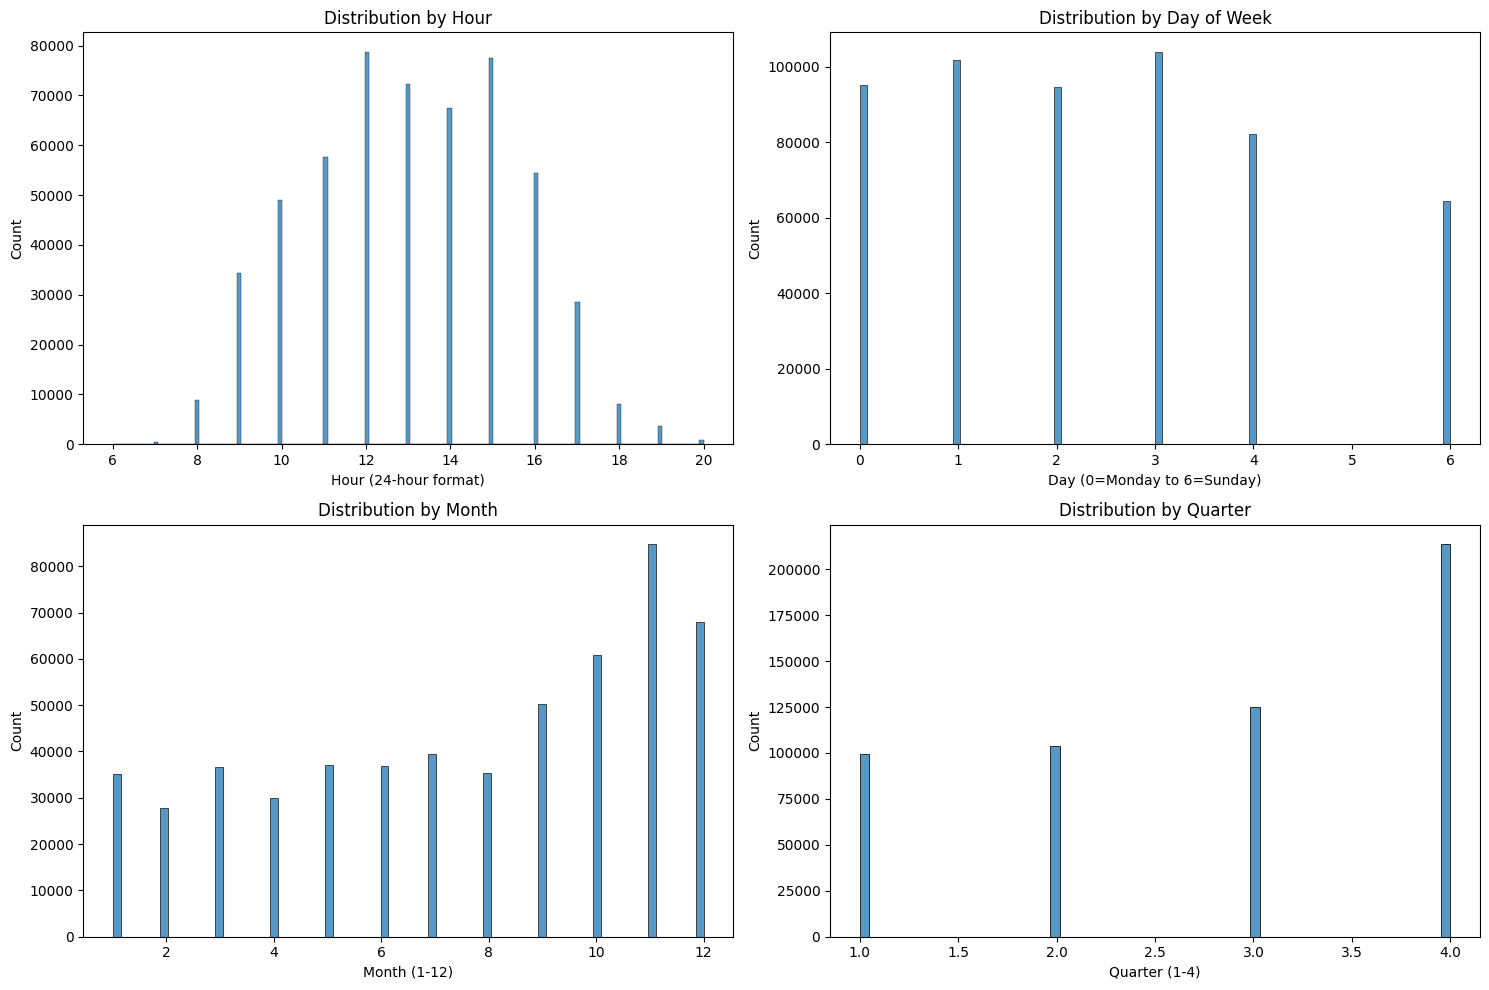

In [8]:
# Initialize analyzer
analyzer = BasicDateTimeAnalyzer(df)

# Process datetime
df_processed = analyzer.process_datetime('InvoiceDate')

# Extract time features
time_features = analyzer.extract_time_features('InvoiceDate')

# Add features to dataframe
for feature_name, feature_values in time_features.items():
    df_processed[feature_name] = feature_values

# Create visualizations
analyzer.visualize_time_patterns('InvoiceDate')

## Derivations from the graphs :
- #### Most Purchases were made during the afternoon of the day mainly between 12pm to 3pm
- #### Most Purchases were made during the opening 4 days of the week, while significantly low purchases were made during Friday and Sunday. And No purchases have been made on Saturday.
- #### The amount of Purchases increases significantly during the last quarter of the year. 

## After the following analysis we have drawn the following insights:

### We need to create the following columns :
- #### "Revenue" to gather the total order value for the calculation of CLTV.
- #### "CLTV" to know the customer lifetime value and this column will be our target variable.

In [9]:
#Creating a copy of the dataframe for visualization purposes
df_copy = df.copy()

In [10]:
# Calculate the total revenue for each customer
df_copy['Revenue'] = df_copy['Quantity'] * df_copy['UnitPrice']

# Calculate the average order value
average_order_value = df_copy.groupby('CustomerID')['Revenue'].mean()

# Calculate the purchase frequency
purchase_frequency = df_copy.groupby('CustomerID')['InvoiceNo'].nunique()

# Calculate the customer lifespan (in months)
df_copy['InvoiceDate'] = pd.to_datetime(df_copy['InvoiceDate'])
customer_lifespan = (df_copy.groupby('CustomerID')['InvoiceDate'].max() - df_copy.groupby('CustomerID')['InvoiceDate'].min()).dt.days / 30

# Calculate the CLTV
cltv = average_order_value * purchase_frequency * customer_lifespan

# Add the CLTV as a new column to the dataframe
df_copy = df_copy.merge(cltv.rename('CLTV'), on='CustomerID', how='left')

print(df_copy.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   day  hour  dayofweek  quarter  Revenue         CLTV  
0    1     8          2        4    15.30  1404

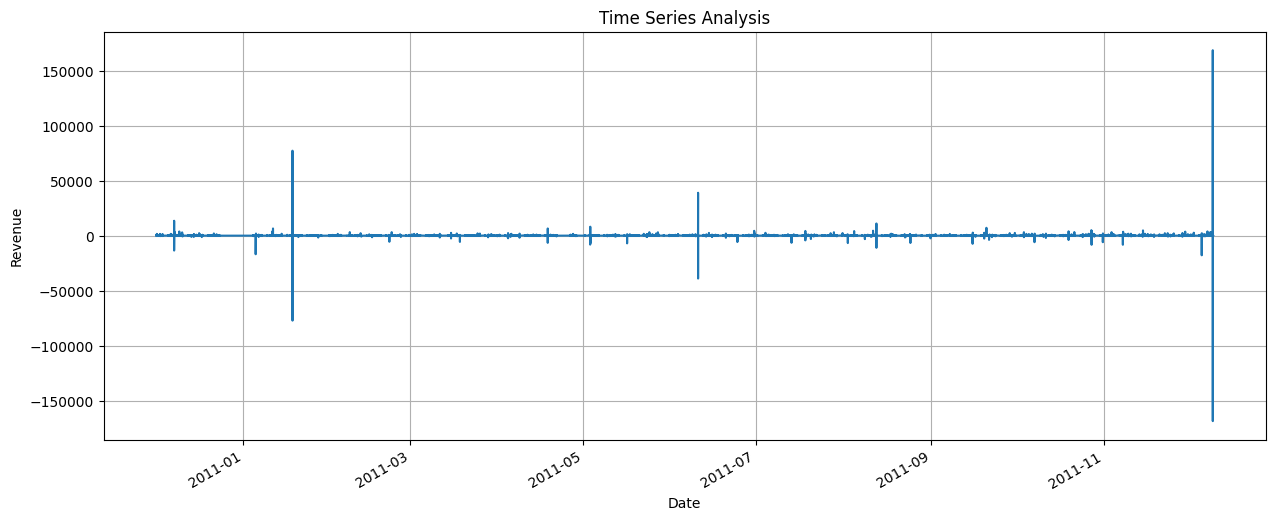

In [11]:
analyzer = BasicDateTimeAnalyzer(df_copy)
# Plot time series with Revenue
analyzer.plot_time_series('InvoiceDate', 'Revenue')

## From The Analysis we have gathered the following insights:

- #### There are clear spikes in the data with extremely high positive and negative Revenue values, particularly around early 2011 (around January and March) and at the end of 2011 (around November/December). These extreme values deviate significantly from the general trend, indicating that they might be outliers or genuine outliers.

- #### Positive Spikes: These could be large orders that might have resulted from promotional sales or bulk purchases.

- #### Negative Spikes: These likely represent large-scale returns or cancellations, as negative revenues are generally associated with refunds or returns.